In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_csv('credit.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
10,11,33,7,15,92152,1,0.4,2,82,0,1,1,1,1
11,12,31,6,64,92121,2,0.1,1,0,0,0,0,1,1
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1
13,14,61,37,141,92677,3,0.7,1,0,1,0,1,1,1
14,15,59,35,91,95008,2,1.6,1,0,0,1,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15 non-null     int64  
 1   Age                 15 non-null     int64  
 2   Experience          15 non-null     int64  
 3   Income              15 non-null     int64  
 4   ZIP Code            15 non-null     int64  
 5   Family              15 non-null     int64  
 6   CCAvg               15 non-null     float64
 7   Education           15 non-null     int64  
 8   Mortgage            15 non-null     int64  
 9   Personal Loan       15 non-null     int64  
 10  Securities Account  15 non-null     int64  
 11  CD Account          15 non-null     int64  
 12  Online              15 non-null     int64  
 13  CreditCard          15 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 1.8 KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,43.733333,18.333333,74.933333,93128.733333,2.400000,1.820000,1.733333,15.800000,0.266667,0.333333,0.200000,0.400000,0.600000
std,4.472136,12.566774,12.367392,53.234611,1777.059910,1.183216,1.837389,0.703732,43.919081,0.457738,0.487950,0.414039,0.507093,0.507093
min,1.000000,25.000000,1.000000,11.000000,90089.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,34.000000,7.500000,31.500000,91916.000000,1.500000,0.550000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,39.000000,15.000000,64.000000,92677.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.500000,56.000000,29.500000,114.500000,94720.000000,3.500000,2.150000,2.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
max,15.000000,62.000000,37.000000,180.000000,96008.000000,4.000000,6.500000,3.000000,155.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dropna(inplace= True)

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df.shape

(15, 14)

In [10]:
df['CreditCard'].value_counts()

CreditCard
1    9
0    6
Name: count, dtype: int64

In [11]:
df[:]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1


In [12]:
X = df.iloc[:,0:13].values
Y = df.iloc[:,13].values

In [14]:
# in adaboost the max depth is always should be 1 
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X, Y)
df['y_pred'] = dtc.predict(X)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1


Step # 01  create a decision tree stump

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

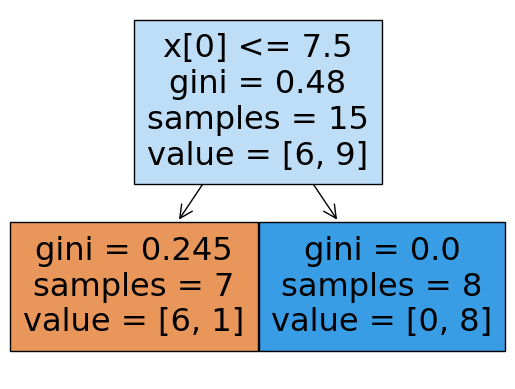

In [15]:
# Decision tree stump 
tree.plot_tree(dtc, filled= True)

Step # 02 Calculate the sample weights

In [16]:
# calculate sample weights of each data points
df['sample_Weights'] = 1/df.shape[0]
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred,sample_Weights
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0.066667
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.066667
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.066667
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.066667
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.066667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.066667
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0.066667
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1,0.066667
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1,0.066667


In [17]:
df['sample_Weights'].sum()

0.9999999999999999

Step # 03  Calculate the errors and performance stump

In [18]:
# Calculate the total error between given credit cards and predicted credit cards

error = df['CreditCard'] == df['y_pred']
error

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
dtype: bool

func formula of adaboost
f = alpha *model_weight
(alpha = performace stump)
(model_weight = that can wrongly predict data points) 

In [19]:
# performace stump 
# create the func to calculate the performance stump

def calculate_model_weights(error):
        return  0.5*np.log((1-error)/(error))


In [20]:
# in error parameter we pass the total no of errors where the error value is false its a wrong prediction 3 errors means 2/15 
# we can find the alpha value to solve the func formula of adaboost

alpha1 = calculate_model_weights(1/15)
alpha1

1.3195286648076292

In [21]:
def adaboost_formula(row, alpha1= 1.319):
    f = alpha1*row
    print(f)

Step # 04 Updated the weights

In [22]:
# alpha = performance stump row wise values check
def updated_weights(row,alpha1= 1.319):
    if row['CreditCard'] == row['y_pred']:
        # correctly predicted same sample weight
        return row['sample_Weights']*np.exp(-alpha1)
    else:
        # incorrectly predicted updated weight
        return row['sample_Weights']*np.exp(alpha1)

In [23]:
df['updated weights'] = df.apply(updated_weights, axis=1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred,sample_Weights,updated weights
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0.066667,0.017827
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.066667,0.017827
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.066667,0.017827
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.066667,0.017827
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.066667,0.249312
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.066667,0.017827
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.066667,0.017827
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0.066667,0.017827
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1,0.066667,0.017827
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1,0.066667,0.017827


Step # 05 Normalized Weights and Assigning Bins 

In [24]:
df['updated weights'].sum()

0.49888772128603714

In [25]:
df['normalize_weights'] = df['updated weights']/ df['updated weights'].sum()
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred,sample_Weights,updated weights,normalize_weights
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.066667,0.017827,0.035733
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.066667,0.017827,0.035733
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.066667,0.249312,0.499736
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.066667,0.017827,0.035733
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.066667,0.017827,0.035733
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0.066667,0.017827,0.035733
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1,0.066667,0.017827,0.035733
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1,0.066667,0.017827,0.035733


In [26]:
df['normalize_weights'].sum()

0.9999999999999993

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalize_weights'])

In [28]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalize_weights']

In [29]:
df[['ID', 'Age',	'Experience', 'Income',	'ZIP Code', 'Family', 'CCAvg',	'Education',	'Mortgage',	'Personal Loan',	'Securities Account',	'CD Account',	'Online',	'CreditCard',	'sample_Weights',	'y_pred',	'updated weights',	'normalize_weights', 'cumsum_lower',	'cumsum_upper']]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,sample_Weights,y_pred,updated weights,normalize_weights,cumsum_lower,cumsum_upper
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.066667,0,0.017827,0.035733,0.000000,0.035733
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.066667,0,0.017827,0.035733,0.035733,0.071466
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.066667,0,0.017827,0.035733,0.071466,0.107199
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.066667,0,0.017827,0.035733,0.107199,0.142933
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,0,0.249312,0.499736,0.142933,0.642668
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.066667,0,0.017827,0.035733,0.642668,0.678402
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0.066667,0,0.017827,0.035733,0.678402,0.714135
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.714135,0.749868
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,0.066667,1,0.017827,0.035733,0.749868,0.785601
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,0.066667,1,0.017827,0.035733,0.785601,0.821334


Step # 06 To create a random new dataset

In [30]:
# import random 
def create_new_dataset(df):
    dataset = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper']  > a and a > row['cumsum_lower']:
                dataset.append(index)
    return dataset

In [31]:
dataset_values = create_new_dataset(df)
dataset_values

[3, 12, 4, 4, 4, 2, 12, 5, 4, 4, 4, 11, 4, 4, 4]

In [32]:
df2 = df.iloc[dataset_values, 0:14]
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [33]:
X = df2.drop(columns= 'CreditCard')
Y = df2['CreditCard']

In [34]:
df2['sample_weights'] = 1/df2.shape[0]
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,sample_weights
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.066667
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.066667
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667


In [35]:
df2['sample_weights'].sum()

0.9999999999999999

In [36]:
# in adaboost the max depth is always should be 1 
dtc2 = DecisionTreeClassifier(max_depth=1)
dtc2.fit(X, Y)
df2['y_pred2'] = dtc2.predict(X)
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,sample_weights,y_pred2
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.066667,0
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.066667,0
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.066667,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1


In [37]:
df2.shape

(15, 16)

In [38]:
# calculate error
error = df2['CreditCard'] == df2['y_pred2']
error

3      True
12     True
4      True
4      True
4      True
2      True
12     True
5     False
4      True
4      True
4      True
11     True
4      True
4      True
4      True
dtype: bool

In [39]:
# performace stump 
# create the func to calculate the performance stump

def calculate_model_weights(error):
        return  0.5*np.log((1-error)/(error))


In [40]:
alpha2 = calculate_model_weights(1/15)
alpha2

1.3195286648076292

In [41]:
# function formula of adaboost
def adaboost_formula(row, alpha2= 1.319):
        f = alpha2*row
        return f

In [42]:
def update_weights(row, alpha2= 1.319):
    if row['CreditCard'] == row['y_pred2']:
        return row['sample_weights']*np.exp(-alpha2)
    else:
        return row['sample_weights']*np.exp(alpha2)

In [43]:
df2['update weights'] = df2.apply(update_weights, axis=1)
df2

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,sample_weights,y_pred2,update weights
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.066667,0,0.017827
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1,0.017827
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.066667,0,0.017827
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1,0.017827
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.066667,1,0.249312
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827


In [44]:
df2['update weights'].sum()

0.49888772128603714

In [45]:
df2['normalize_weights'] = df2['update weights']/df2['update weights'].sum()
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred,sample_Weights,updated weights,normalize_weights,cumsum_upper,cumsum_lower
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733,0.035733,0.000000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733,0.071466,0.035733
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.066667,0.017827,0.035733,0.107199,0.071466
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.066667,0.017827,0.035733,0.142933,0.107199
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.066667,0.249312,0.499736,0.642668,0.142933
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.066667,0.017827,0.035733,0.678402,0.642668
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.066667,0.017827,0.035733,0.714135,0.678402
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0.066667,0.017827,0.035733,0.749868,0.714135
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1,0.066667,0.017827,0.035733,0.785601,0.749868
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1,0.066667,0.017827,0.035733,0.821334,0.785601


In [46]:
df2['normalize_weights'].sum()

0.9999999999999993

In [47]:
df2['cumsum_upper'] = np.cumsum(df2['normalize_weights'])

In [48]:
df2['cumsum_lower'] = df2['cumsum_upper'] - df2['normalize_weights']

In [49]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,y_pred,sample_Weights,updated weights,normalize_weights,cumsum_upper,cumsum_lower
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733,0.035733,0.000000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,0.066667,0.017827,0.035733,0.071466,0.035733
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0.066667,0.017827,0.035733,0.107199,0.071466
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.066667,0.017827,0.035733,0.142933,0.107199
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.066667,0.249312,0.499736,0.642668,0.142933
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0,0.066667,0.017827,0.035733,0.678402,0.642668
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.066667,0.017827,0.035733,0.714135,0.678402
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0.066667,0.017827,0.035733,0.749868,0.714135
8,9,32,7,129,94720,4,5.2,2,0,1,0,0,0,1,1,0.066667,0.017827,0.035733,0.785601,0.749868
9,10,59,35,180,96008,2,6.5,2,0,1,1,1,1,1,1,0.066667,0.017827,0.035733,0.821334,0.785601


In [50]:
df2[['ID', 'Age',	'Experience', 'Income',	'ZIP Code', 'Family', 'CCAvg',	'Education',	'Mortgage',	'Personal Loan',	'Securities Account',	'CD Account',	'Online',	'CreditCard',	'sample_weights',	'y_pred2',	'update weights',	'normalize_weights', 'cumsum_lower',	'cumsum_upper']]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,sample_weights,y_pred2,update weights,normalize_weights,cumsum_lower,cumsum_upper
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.066667,0,0.017827,0.035733,0.000000,0.035733
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1,0.017827,0.035733,0.035733,0.071466
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.071466,0.107199
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.107199,0.142933
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.142933,0.178666
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.066667,0,0.017827,0.035733,0.178666,0.214399
12,13,62,32,142,95112,2,2.8,3,0,1,0,0,0,1,0.066667,1,0.017827,0.035733,0.214399,0.250132
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.066667,1,0.249312,0.499736,0.250132,0.749868
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.749868,0.785601
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.066667,1,0.017827,0.035733,0.785601,0.821334


In [51]:
input_array = np.array([10,59,35,180,96008,2,6.50,2,0,1,1,1,1]).reshape(1,13)
input1 = dtc.predict(input_array)
input1

array([1], dtype=int64)

In [52]:
input2 = dtc2.predict(input_array)
input2

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [53]:
ans1 = alpha1*input1 + alpha2*input2
ans1

array([2.63905733])

In [54]:
np.sign(ans1)

array([1.])

In [55]:
input_array1 = np.array([2,45,19,34,90089,3,1.5,1,0,0,1,0,0]).reshape(1,13)
inp1 = dtc.predict(input_array1)
inp1

array([0], dtype=int64)

In [56]:
inp2 = dtc2.predict(input_array1)
inp2

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
ans2 = alpha1*inp1 + alpha2*inp2
ans2

array([0.])

In [58]:
np.sign(ans2)

array([0.])